## Analysis of 1930-2018 IMDB data (sample excluding metascores)- cont'd: deleting outliers, and implementing data analysis

### Given the extreme outliers for the film length and number of IMDB votes variables, these outliers likely adversely impacted the accuracy and precision of the summary statistics and scatterplots. Even the imdb_ratings variable itself contained many outliers, although most are below the median.

### Among other things, Part 2 of this analysis will exclude these extreme outliers, and see whether this will make the summary statistics and patterns among the variables more clear. 

# Highlights of the code: 
1.) create new set of indicator/dummy variables for each of the 21 genres classified within the IMDB dataset;

2.) Delete the extreme outliers from the sample with respect to the n_votes and length columns/variables.

3.) Export the final Pandas dataframe as a CSV, and import into a PostgreSQL database. 

NOTE!: see here for link on how to import a CSV into a postgreSQL database
http://odo.pydata.org/en/latest/perf.html

In [1]:
#re-import pandas and import various other data analysis libraries
import pandas as pd
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


In [2]:
imdb_data = pd.read_csv('imdb_data_1930_2018.csv')
imdb_data.head(10)

,Unnamed: 0,name,year,length,genre,imdb_rating,n_votes,imdb_ratings_100
0,0,All Quiet on the Western Front,1930,136,Drama,8.1,52716,81
1,1,The Blue Angel,1930,104,Drama,7.8,12138,78
2,2,Animal Crackers,1930,97,Comedy,7.6,12059,76
3,3,L'Age d'Or,1930,63,Comedy,7.4,11235,74
4,4,Murder!,1930,92,Crime,6.4,4954,64
5,5,Morocco,1930,92,Drama,7.2,4746,72
6,6,Hell's Angels,1930,127,Drama,7.7,4372,77
7,7,Earth,1930,75,Drama,7.4,4180,74
8,8,À Propos de Nice,1930,25,Documentary,7.5,3320,75
9,9,The Big Trail,1930,125,Adventure,7.2,2970,72


In [70]:
imdb_data.dtypes

Unnamed: 0            int64
name                 object
year                  int64
length                int64
genre                object
imdb_rating         float64
n_votes               int64
imdb_ratings_100      int64
dtype: object

## Data cleaning, boxplots, and deleting outliers via Pandas

Delete the "Unnamed: 0" column since it does not contain any actual data.

In [71]:
#delete the undesired column
imdb_data = imdb_data.drop(columns =['Unnamed: 0'])
imdb_data.head(10)

,name,year,length,genre,imdb_rating,n_votes,imdb_ratings_100
0,All Quiet on the Western Front,1930,136,Drama,8.1,52716,81
1,The Blue Angel,1930,104,Drama,7.8,12138,78
2,Animal Crackers,1930,97,Comedy,7.6,12059,76
3,L'Age d'Or,1930,63,Comedy,7.4,11235,74
4,Murder!,1930,92,Crime,6.4,4954,64
5,Morocco,1930,92,Drama,7.2,4746,72
6,Hell's Angels,1930,127,Drama,7.7,4372,77
7,Earth,1930,75,Drama,7.4,4180,74
8,À Propos de Nice,1930,25,Documentary,7.5,3320,75
9,The Big Trail,1930,125,Adventure,7.2,2970,72


### Convert the genre object variable to a series of indicator variables so these can be used for quantitative analysis. 

In [9]:
imdb_genres = pd.get_dummies(imdb_data['genre'])
imdb_genres.head(10)

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,History,Horror,Musical,Mystery,Romance,Sci-Fi,Short,Thriller,War,Western
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Use concat() method to merge the imdb_genres dataframe to the primary/original imdb_data dataframe
imdb_data = pd.concat([imdb_data, imdb_genres], axis=1)
imdb_data.head(10)

,Unnamed: 0,name,year,length,genre,imdb_rating,n_votes,imdb_ratings_100,Action,Adventure,...,History,Horror,Musical,Mystery,Romance,Sci-Fi,Short,Thriller,War,Western
0,0,All Quiet on the Western Front,1930,136,Drama,8.1,52716,81,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,The Blue Angel,1930,104,Drama,7.8,12138,78,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Animal Crackers,1930,97,Comedy,7.6,12059,76,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,L'Age d'Or,1930,63,Comedy,7.4,11235,74,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Murder!,1930,92,Crime,6.4,4954,64,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5,Morocco,1930,92,Drama,7.2,4746,72,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6,Hell's Angels,1930,127,Drama,7.7,4372,77,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7,Earth,1930,75,Drama,7.4,4180,74,0,0,...,0,0,0,0,0,0,0,0,0,0
8,8,À Propos de Nice,1930,25,Documentary,7.5,3320,75,0,0,...,0,0,0,0,0,0,0,0,0,0
9,9,The Big Trail,1930,125,Adventure,7.2,2970,72,0,1,...,0,0,0,0,0,0,0,0,0,0


### Now, delete the most extreme outliers from the sample. 

To make the analysis easier to follow, see once again boxplots of film length and number of IMDB votes.

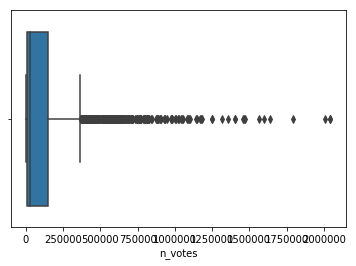

In [74]:
#boxplot of n_votes
fig_box = sns.boxplot(imdb_data['n_votes'])

Outliers for n_votes are essentially only those above the median; in this case, outliers appear to films for which the n_votes variable is greater than approximately 375,000 votes. 



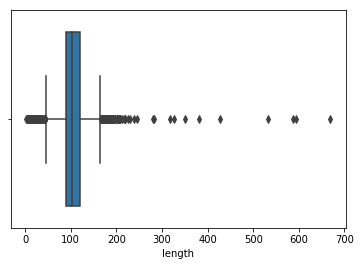

In [28]:
#boxplot of film length
fig_box = sns.boxplot(imdb_data['length'])

Notice the outliers of film length are films less than or equal to 50 minutes in length as well as films that are equal to or longer than than approximately 175 minutes.  

Having identified the ranges of the outlier values, delete all outliers from n_votes and length.

In [75]:
#delete outliers from n_votes column
#start by defining an index on the values of n_votes that constitute outliers: i.e., greater than 375,000 votes
indexN = imdb_data[(imdb_data['n_votes'] >375000)].index

imdb_data.drop(indexN, inplace=True)

In [80]:
#sanity check: show the max value of n_votes to ensure the sample is limited to number of votes below 375,000
imdb_data['n_votes'].max()

372791

In [96]:
#delete outliers from the length column
#start by defining an index of the range of values that need to be deleted
#use Pandas' or operator--(i.e., |)-- to specify both conditions

indexN2 = imdb_data[(imdb_data['length'].ge(175)) | (imdb_data['length'].le(50))].index
                   
#drop the specified ranges of data to delete these outliers from the dataframe
imdb_data.drop(indexN2, inplace=True)

In [98]:
#sanity check: check that the max value of the film length is less than or equal to 175
imdb_data['length'].max()

174

In [99]:
#sanity check: check that the min value of the film length is greater than or equal to 50
imdb_data['length'].min()

51

Having deleted the outliers, it's good protocol to export the data to another CSV file.

We can then proceed to re-implementing various summary statistics and scatter plots originally done in Part I, and then compare the results.

In [23]:
#export
imdb_data.to_csv('imdb_data_1930_2018_tidy.csv')

## Plots and data analysis 

In [114]:
#import data
imdb_data = pd.read_csv('imdb_data_1930_2018_tidy.csv')

Now, continute with the data analysis.
Let's start with a scatterplot of film length and imd_rating. 

While this can help show a trend via the line of best fit, a line plot is generally more effective in showing changes in the data over time, especially when there are so many data points (less messy display with lines as opposed to the thousands of scattered data points).

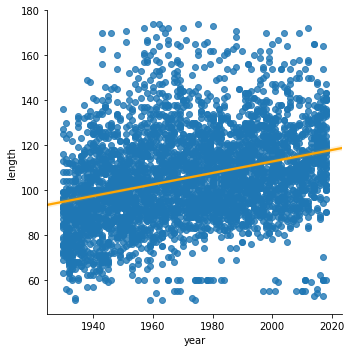

In [103]:
#scatter plot of length over time
#regression line set to an orange color for better readability
sns.lmplot(x='year',y='length', data=imdb_data, line_kws = {'color':'orange'})

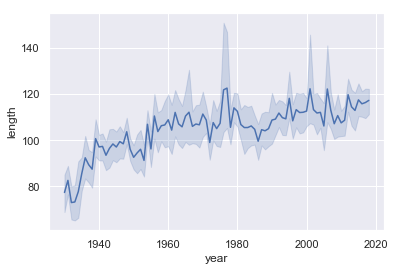

In [6]:
#show lineplot as point of comparison
sns.lineplot(x='year',y='length', data=imdb_data)

Notice the extra details that a line plot shows, which is missing from the scatter plot. 

While both plots show an upward trend in film length over time, the line plot shows many extra details, such as the peaks and volleys in the film length data. For example, film length reached a trough in the mid-1930s, when the average film length was only about 70 minutes. 

While more recent films (i.e., released from the early 2000s to 2018)  have had among the highest overall film lengths, films in the late 1970s and early 1980s also tended to be quite long as well. In fact, film length reached its peak in 1977-1978 (around the release of the original Star Wars).  

Now, let's proceed with a jointplot and show the actual degree of linear corrrelaiton between film length and year. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


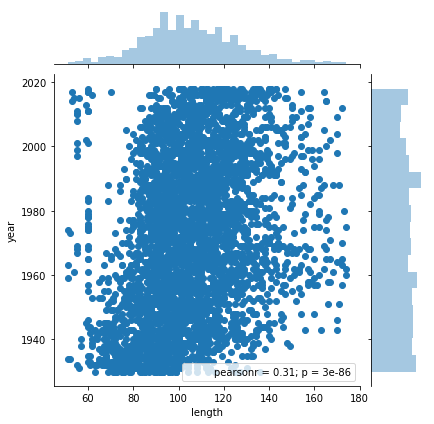

In [106]:
sns.jointplot(x='length', y='year', data = imdb_data)

Having eliminated the high and low outliers from film length, surprisingly there's a moderately higher ppositive trend of film length over time. With a pearson correlation coefficient of 31%, film length has increased moderately over time, on average.

This difference just from eliminating the outliers again emphasizes the importance of taking outliers seriously.

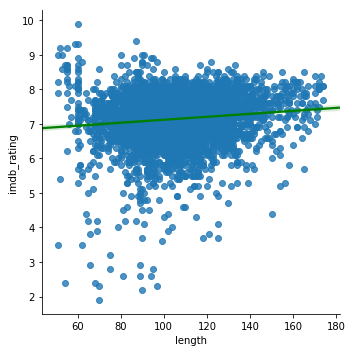

In [109]:
#scatter plot of length and imdb ratings, with regression line set to green
sns.lmplot( x='length',y='imdb_rating', data=imdb_data, line_kws = {'color':'green'})

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


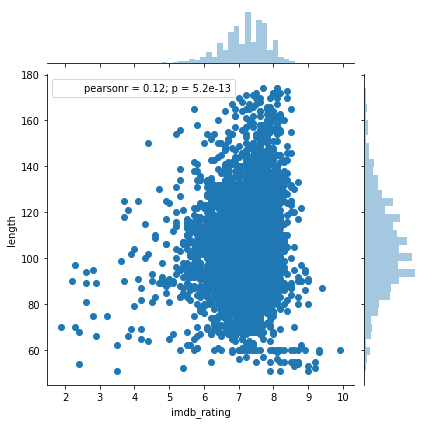

In [110]:
sns.jointplot(x='length', y='imdb_rating', data = imdb_data)

Notice that film length shows a slight positive correlation with film length, so longer films tend to have slightly higher IMDB ratings. But the connection is not substantial.

Now, examine imdb_ratings over time.

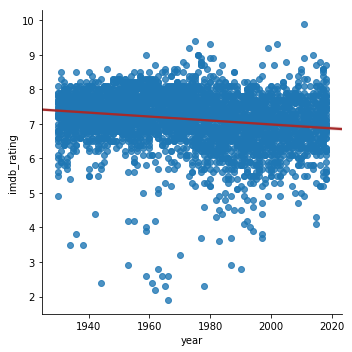

In [111]:
sns.lmplot('year', 'imdb_rating', data=imdb_data, line_kws = {'color':'brown'})

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


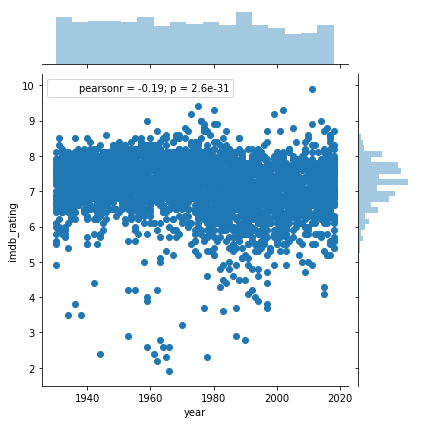

In [112]:
sns.jointplot('year', 'imdb_rating', data=imdb_data)

Interestingly, eliminating the outliers for both the film length and number of IMDB votes variables has led to a moderately larger negative trend of IMDB ratings over time. Instead of a mere 7.9% negative correlation, there is now a 19% negative correlation, indicating a moderate (though not large) negative trend of IMDB ratings over time.

Caveat: while the IMDB ratings are distributed slightly more symmetrically than the number of IMDB votes and film length columns before these variables' data were rid of outliers, the IMDB ratings still do contain a fair number of outliers.

Since these outliers might be throwing off the plots, let's delete the outliers for IMDB ratings as well.

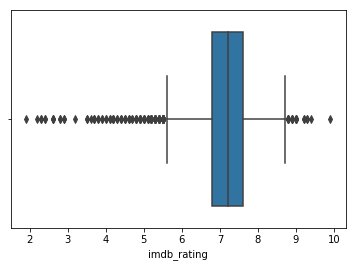

In [116]:
#boxplot of imdb ratings
fig_box = sns.boxplot(imdb_data['imdb_rating'])

#notice there are many outliers well below the median, and several lying above the median: less than or equal to 5.5, and greater than or equal to 8.7

In [117]:
#index to set up range for IMDB ratings to be deleted
indexN3 = imdb_data[(imdb_data['imdb_rating'].ge(8.7)) | (imdb_data['imdb_rating'].le(5.5))].index
                   
#drop the specified ranges of data to delete these outliers from the dataframe
imdb_data.drop(indexN3, inplace=True)

In [118]:
#sanity check for IMDB ratings' max value
imdb_data['imdb_rating'].max()

8.6

In [119]:
#sanity check for IMDB ratings' min value
imdb_data['imdb_rating'].min()

5.6

Outliers on both extremes of the IMDB ratings distribution have clearly been deleted.

Now we can proceed with reimplementing the plots using the IMDB ratings data. While scatterplots have some value showing correlations between 2 or more variables (the latter would work if using a 3D plot), lineplots can provide a better means of visualizing trends over time, especially when there are many data points. Better comparisons can be made as well 

As a result, I will first show a scatter plot, but then a lineplot to show how much smoother and simpler the lineplot can be.

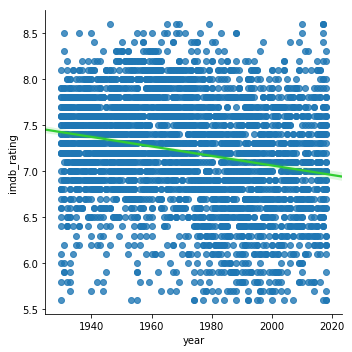

In [126]:
#scatter plot of IMDB rating over time
sns.lmplot('year', 'imdb_rating', data=imdb_data, line_kws = {'color':'limegreen'})

/Users/kevinallen/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


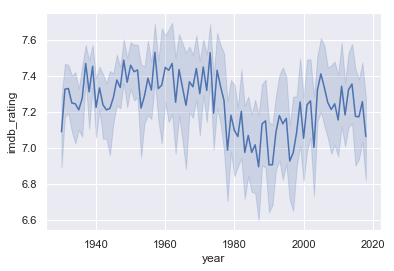

In [5]:
#IMDB votes over time using lineplot
sns.lineplot('year', 'imdb_rating', data=imdb_data)

Notice the lineplot provides a much better summary of the IMDB ratings over time, notwithstanding the line of best fit shown in the scatter plot. 

While the scatterplot may suggest that, on average, IMDB ratings have decreased for films released more recently, the lineplot provides a few clarifications to this initial observation.

1.) For example, IMDB ratings reached an overall peak, on average, for films released from the late 1930s (especially beginning around 1937-1939), and remained fairly high (with only a few years with modest dips) through the mid 1970s. 

2.) While IMDB ratings are lower, on average, for the most recent decade (i.e., 2008-2018) than the period of 1937 to 1977, the lowest IMDB ratings took place during the very late 1970s to mid 1990s. Then, starting in the late 1990s, the IMDB ratings began to increase once again, but never back to the peak that was reached during the earlier decades of the sample. 

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


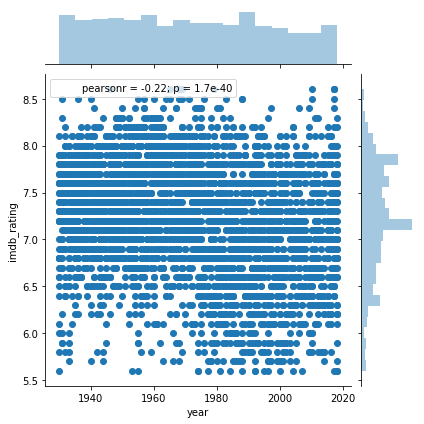

In [127]:
#jointplot, showing histogram and scatter plot (plus pearson correlation coefficient)
sns.jointplot('year', 'imdb_rating', data=imdb_data)

Somewhat surprisingly, the negative trend of IMDB ratings over time has increased slightly. 

Having deleted the outliers, we can be fairly confident that there's a modest (again, not very high) decline in IMDB ratings over time. For example, IMDB ratings on the lowest range of the distribution, from about 5.6 to 6.0, seems to be more heavily represented for films from the 1980s to the early 2000s.

Thus, the perceived quality of newer films is slightly lower than that of older films. 

Now, let's use the genre binary/indicator variables to examine various plots by genre, and comparing genres to film lengths and, IMDB ratings.

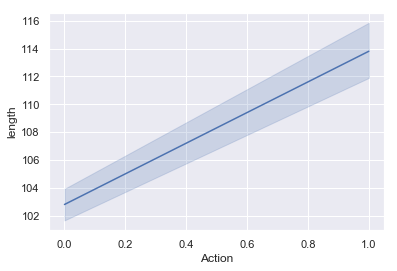

In [15]:
#film length and Action films
ax = sns.lineplot(x='Action', y='length', data=imdb_data)

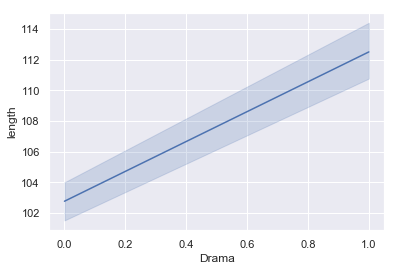

In [14]:
#film length and Action films
ax = sns.lineplot(x='Drama', y='length', data=imdb_data)

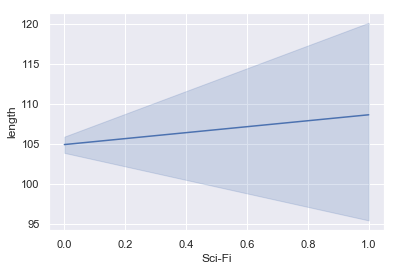

In [19]:
#film length and Sci-fi films
ax = sns.lineplot(x='Sci-Fi', y='length', data=imdb_data)

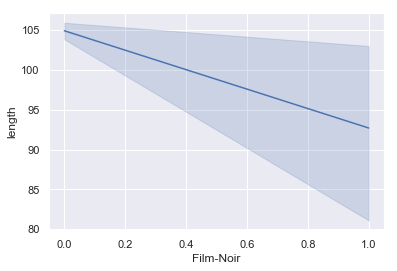

In [27]:
ax = sns.lineplot(x='Film-Noir', y='length', data=imdb_data)

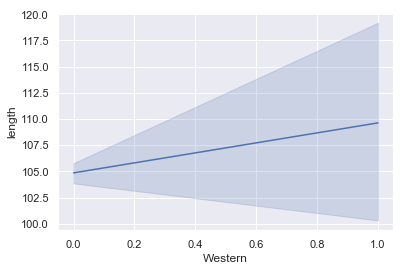

In [28]:
ax = sns.lineplot(x='Western', y='length', data=imdb_data)

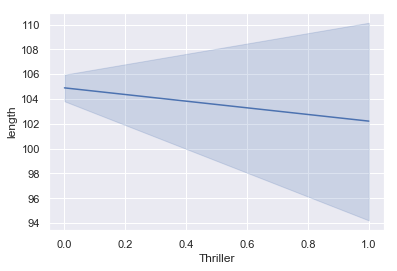

In [30]:
ax = sns.lineplot(x='Thriller', y='length', data=imdb_data)

Compared with the sample's average of film length, Drama and Action films are moderately longer, by about 10-12+ minutes. Westerns and Sci-Fi films are longer, but only by about 3-5 minutes.

Film-Noir films are moderately shorter, however, with about 10+ minutes less in length. 

Scatter plots by genre and IMDB ratings.

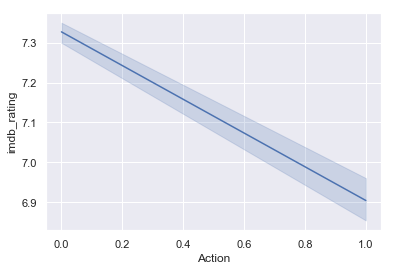

In [21]:
ax = sns.lineplot(x='Action', y='imdb_rating', data=imdb_data)

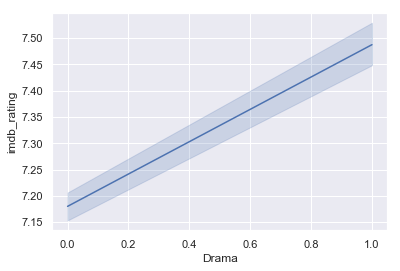

In [17]:
ax = sns.lineplot(x='Drama', y='imdb_rating', data=imdb_data)

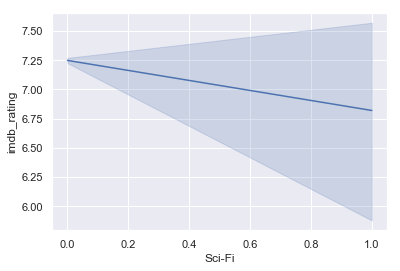

In [22]:
ax = sns.lineplot(x='Sci-Fi', y='imdb_rating', data=imdb_data)

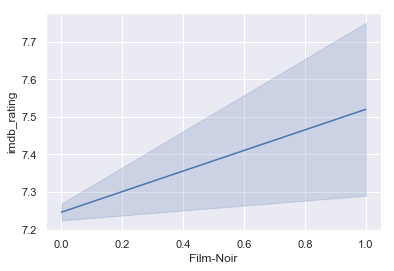

In [24]:
ax = sns.lineplot(x='Film-Noir', y='imdb_rating', data=imdb_data)

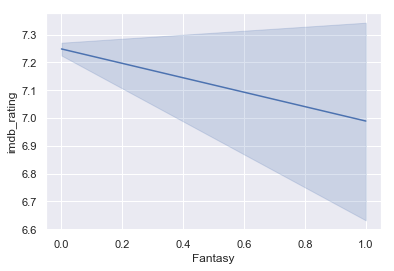

In [25]:
ax = sns.lineplot(x='Fantasy', y='imdb_rating', data=imdb_data)

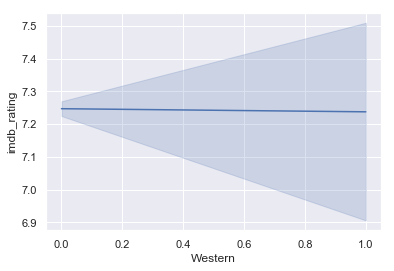

In [26]:
ax = sns.lineplot(x='Western', y='imdb_rating', data=imdb_data)

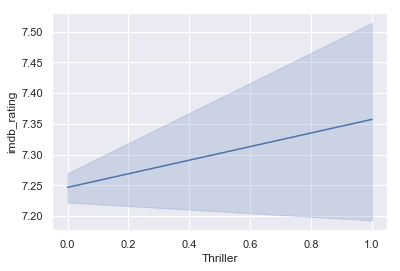

In [29]:
ax = sns.lineplot(x='Thriller', y='imdb_rating', data=imdb_data)

IMDB ratings similarly differ fairly signficant among the different genres showcased above. 

Action and Fantasy films in particular show a moderately lower IMDB rating than the sample average. Film-Noir and Drama films show a moderately higher IMDB rating, while IMDB ratings for Westerns interestingly are almost exactly the same as the sample average.